In [60]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO
import numpy as np
import random

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 500, 500)
    ctx = cairo.Context(surface)
    draw_func(ctx, 500, 500)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=500))

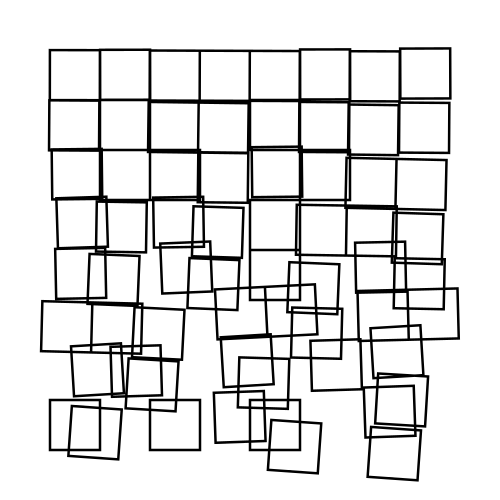

In [62]:
@disp
def draw(cr, width, height):
    
    cr.scale(width, height)
    cr.set_line_width(0.005)
    
    # Defining the width, height and the starting coordinates of the squares
    w = 0.1
    h = 0.1
    xs = np.arange(0.1, 0.9, w)
    ys = np.arange(0.1, 0.9, h)
    
    # An array of the degree of rotation of the squares that increases with the rows
    rot = np.linspace(0.1, 2, len(ys))

    for y in range(len(ys)):
        
        r = rot[y]
        for x in range(len(xs)):
            
            cr.save()
            side = random.choice([-2, -1, 0, 1, 2])     # Randomly choose whether the square is rotated to the left or right
            cr.rotate(r * np.pi/180 * side)
            cr.rectangle(xs[x], ys[y], w, h)
            cr.restore()                                # To ensure transformations are not adding up over the loop
    
    cr.stroke()